In [25]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

## Task 2: Stopping to pay Premium

In [26]:
def Qx(gender,x,t,param =[]):
# This is our default mortality
    if gender == 0:
        a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
    else:
        a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
    return(np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))

In [27]:
x = 80
i = 0.02
v = 1/(1+i)
N=10

# initialization:
l0 = 1e5

#### Subtask 2.1

In [28]:
def Difference_Commuting(x,n,v, specification, l0=100):
    lx = np.zeros(n+1)
    dx = np.zeros(n)

    lx[0] = l0

    for t in range(0,n):
        qx = Qx(0,x+t,2020)
        lx[t+1] = lx[t]*(1 - qx)
        dx[t] = lx[t] * qx

    result = 0.0
    
    if specification =='M':
        for t in range(0,n):
            result += v **(x+t+1) * dx[t]
    elif specification =='N':
        for t in range(0,n):
            result += v ** (x+t) * lx[t]
    elif specification =='C':
        result += v **(x+n+1) * lx[-1]
    elif specification =='D':
        result += v **(x+n) * dx[-1]
    else:   
        raise ValueError("Specification must be 'M' or 'N'")
    return(result)

In [32]:
P = (Difference_Commuting(x=80, n=10, v=v, specification='M') + Difference_Commuting(x=80, n=10, v=v, specification='D')) /Difference_Commuting(x=80, n=10, v=v, specification='N')
print("The annual premium is: ", P)

The annual premium is:  0.07903566455196753


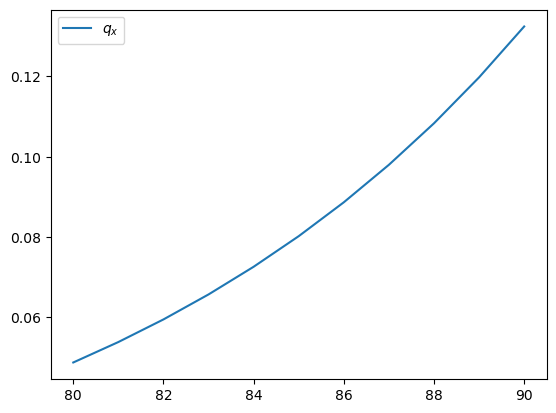

In [33]:
plt.figure()
plt.plot([x+t for t in range(N+1)], [Qx(0,x+t,2020) for t in range(N+1)], label=r'$q_x$')
plt.legend()

## Task 3 Disability Insurance on two lives